In [84]:
from PIL import Image, ImageFont, ImageDraw
import numpy as np
import cv2
import string

from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline

img_path = "../data/cat.png"
kernel_size = 5

chars = " .,<>[]()\\!|/[]"
charsTest = "?{|"

In [91]:
def getCharImages(chars, font_path=None):
    # font_path = font_path or "./fonts/SFMono-Medium.otf"
    # try:
    #     font = ImageFont.truetype(font_path, size=200)
    #     font_size = font.getsize(string.printable)[1]
    # except IOError:
    font = ImageFont.load_default()
    font_size = font.getsize(string.printable)[1]
    # print("Warning: Could not use chosen font. Using default.")

    charImgs = []
    for char in chars:
        # init image
        char_w = font.getsize(char)[0]
        char_h = font_size
        image = Image.new("L", (char_w, char_h), color=0)

        # draw text to image
        draw = ImageDraw.Draw(image)
        draw.text((0, 0), char, fill=255, font=font, spacing=0)

        # convert image to np array
        charImgs.append(np.array(image))

    return np.array(charImgs)


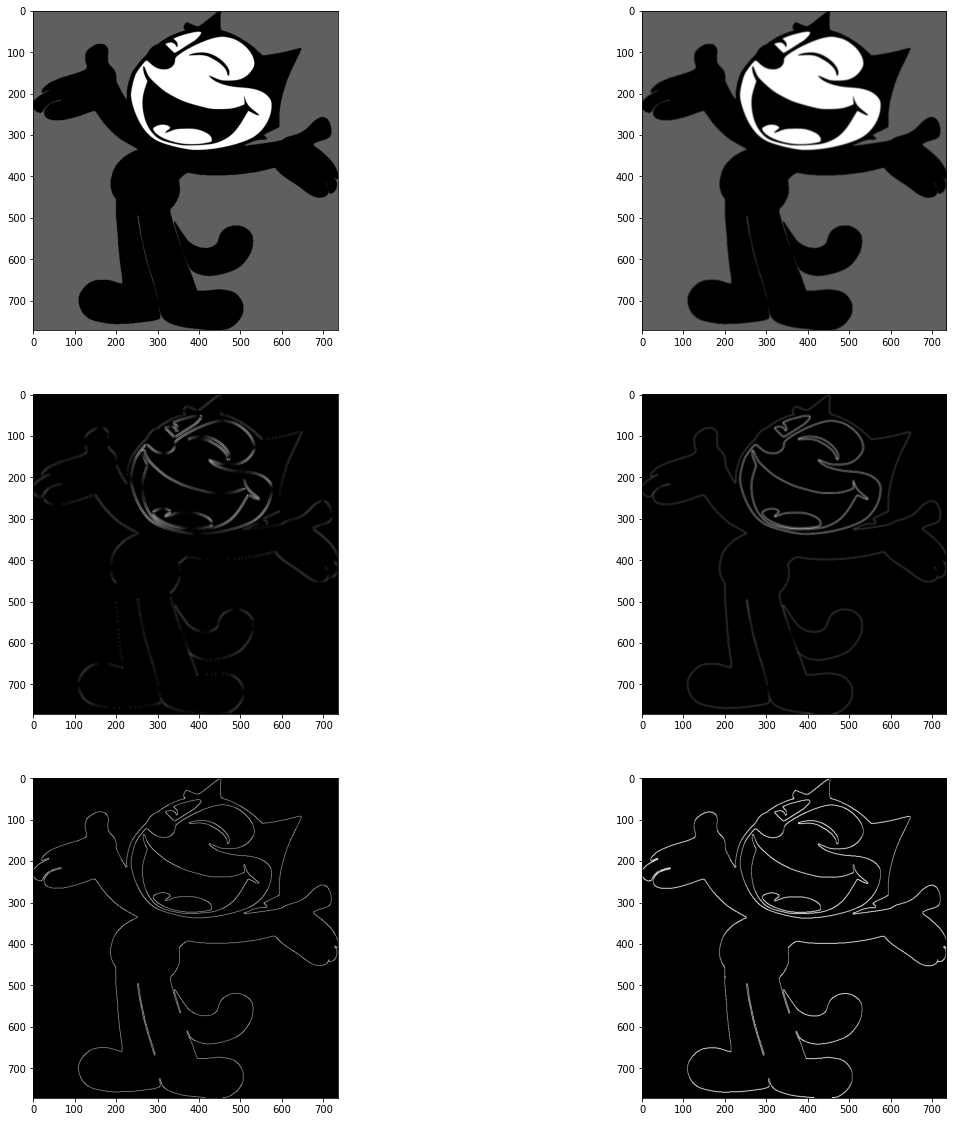

In [85]:
img = cv2.imread(img_path, 0)

blur_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

sobel_img = cv2.Sobel(
    src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5
)  # Combined X and Y Sobel Edge Detection

sobel_img = np.absolute(sobel_img)
sobel_img = np.uint8(sobel_img)

# laplacian
laplacian_img = cv2.Laplacian(
    src=blur_img, ddepth=cv2.CV_64F, ksize=1
)  # Combined X and Y Sobel Edge Detection

laplacian_img = np.absolute(laplacian_img)
laplacian_img = np.uint8(laplacian_img)

# canny 
canny_img = cv2.Canny(blur_img, 100, 200)

# dileted canny 
canny_dilated = cv2.dilate(canny_img, (5,5))

# plot
plt.figure(figsize=(20,20))

plt.subplot(321)
plt.imshow(img, cmap="gray")
plt.subplot(322)
plt.imshow(blur_img, cmap="gray")
plt.subplot(323)
plt.imshow(sobel_img, cmap="gray")
plt.subplot(324)
plt.imshow(laplacian_img, cmap="gray")
plt.subplot(325)
plt.imshow(canny_img, cmap="gray")
plt.subplot(326)
plt.imshow(canny_dilated, cmap="gray")
plt.show()

In [120]:
# get char images 
char_dict = getCharImages(chars=chars)

_, char_h, char_w = char_dict.shape
img_h, img_w = canny_dilated.shape
rows, cols = img_h // char_h, img_w // char_w

print(f"num of chars: {len(chars)}")
print(char_dict.shape)
print(rows, cols)

# arr = np.ones((h,w)) * 255

# sub = char_dict - arr
# print(sub.shape)
# print(np.linalg.norm(sub, axis=(1,2)))
# print(arr)
# print(char_dict)

out_chars = []
for i in range(rows):
  row_str = ""
  for j in range(cols):
    sample = laplacian_img[i*char_h:(i+1)*char_h,j*char_w:(j+1)*char_w]
    # sample = np.ones((char_h, char_w)) * 255
    euclidean_norms = np.linalg.norm(char_dict - sample, axis=(1,2))
    char_i = np.argmin(euclidean_norms)
    # print(f"sample: {sample.shape}")
    # print(f"norms: {euclidean_norms.shape}")
    # print(f"index: {char_i}")
    
    row_str += chars[char_i]
  
  print(row_str)
  out_chars.append(row_str)
    


# print(out_chars)

num of chars: 15
(15, 11, 6)
70 122
                                                                                                                          
                                                                                                                          
                                                                                                                          
                                                                                                                          
                                                                                                                          
                                                                                                                          
                                                                                                                          
                                                                                                       